# Trabajando con opciones

## 1. ¿Cómo descargar datos de opciones?

In [3]:
#importar los paquetes que se van a usar
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
%matplotlib inline
#algunas opciones para Pandas
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

Usando el paquete `pandas_datareader` también podemos descargar datos de opciones. Por ejemplo, descarguemos los datos de las opciones cuyo activo subyacente son las acciones de Apple

In [21]:
aapl = web.Options('AAPL', 'yahoo')
aapl_opt = aapl.get_all_data().reset_index()
aapl_opt

,Strike,Expiry,Type,...,Quote_Time,Last_Trade_Date,JSON
0,2.5,2018-02-16,call,...,2018-02-07 20:44:01,2018-01-31 14:30:00,"{'contractSymbol': 'AAPL180216C00002500', 'str..."
1,2.5,2018-02-16,put,...,2018-02-07 20:44:01,2018-01-20 04:44:39,"{'contractSymbol': 'AAPL180216P00002500', 'str..."
2,2.5,2018-03-16,put,...,2018-02-07 20:44:02,2018-02-03 04:52:03,"{'contractSymbol': 'AAPL180316P00002500', 'str..."
3,2.5,2018-04-20,call,...,2018-02-07 20:35:49,2017-11-28 16:24:01,"{'contractSymbol': 'AAPL180420C00002500', 'str..."
4,2.5,2018-04-20,put,...,2018-02-07 20:35:49,2017-09-23 03:55:28,"{'contractSymbol': 'AAPL180420P00002500', 'str..."
...,...,...,...,...,...,...,...
966,320.0,2018-04-20,call,...,2018-02-07 20:35:49,2018-02-07 14:32:34,"{'contractSymbol': 'AAPL180420C00320000', 'str..."
967,325.0,2018-07-20,put,...,2018-02-07 20:35:49,2018-01-13 04:45:00,"{'contractSymbol': 'AAPL180720P00325000', 'str..."
968,340.0,2018-07-20,call,...,2018-02-07 20:35:49,2018-01-26 19:12:28,"{'contractSymbol': 'AAPL180720C00340000', 'str..."
969,345.0,2018-02-16,call,...,2018-02-07 20:44:01,2018-01-24 14:35:46,"{'contractSymbol': 'AAPL180216C00345000', 'str..."


Una vez tenemos la información, podemos consultar de qué tipo son las opciones

In [22]:
aapl_opt.loc[:, 'Type']

0      call
1       put
2       put
3      call
4       put
       ... 
966    call
967     put
968    call
969    call
970    call
Name: Type, Length: 971, dtype: object

o en que fecha expiran

In [25]:
aapl_opt.loc[:, 'Expiry']

0     2018-02-16
1     2018-02-16
2     2018-03-16
3     2018-04-20
4     2018-04-20
         ...    
966   2018-04-20
967   2018-07-20
968   2018-07-20
969   2018-02-16
970   2018-03-16
Name: Expiry, Length: 971, dtype: datetime64[ns]

Por otra parte, podríamos querer consultar todas las opciones de compra (call) que expiran en cierta fecha (2018-06-15)

In [67]:
call06 = aapl_opt.loc[(aapl_opt.Expiry=='2018-06-15') & (aapl_opt.Type=='call')]
call06

,Strike,Expiry,Type,...,Quote_Time,Last_Trade_Date,JSON
38,70.0,2018-06-15,call,...,2018-02-07 20:44:02,2018-01-30 15:15:03,"{'contractSymbol': 'AAPL180615C00070000', 'str..."
46,75.0,2018-06-15,call,...,2018-02-07 20:44:02,2017-11-09 20:20:10,"{'contractSymbol': 'AAPL180615C00075000', 'str..."
58,80.0,2018-06-15,call,...,2018-02-07 20:44:02,2018-01-03 17:07:52,"{'contractSymbol': 'AAPL180615C00080000', 'str..."
71,85.0,2018-06-15,call,...,2018-02-07 20:44:02,2017-11-09 20:36:48,"{'contractSymbol': 'AAPL180615C00085000', 'str..."
83,90.0,2018-06-15,call,...,2018-02-07 20:44:02,2018-01-30 14:44:48,"{'contractSymbol': 'AAPL180615C00090000', 'str..."
...,...,...,...,...,...,...,...
882,235.0,2018-06-15,call,...,2018-02-07 20:44:02,2018-02-07 18:27:42,"{'contractSymbol': 'AAPL180615C00235000', 'str..."
892,240.0,2018-06-15,call,...,2018-02-07 20:44:02,2018-02-05 16:10:04,"{'contractSymbol': 'AAPL180615C00240000', 'str..."
903,245.0,2018-06-15,call,...,2018-02-07 20:44:02,2018-02-02 16:45:20,"{'contractSymbol': 'AAPL180615C00245000', 'str..."
914,250.0,2018-06-15,call,...,2018-02-07 20:44:02,2018-02-07 18:07:37,"{'contractSymbol': 'AAPL180615C00250000', 'str..."


## 2. ¿Qué es la volatilidad implícita?

**Volatilidad:** desviación estándar de los rendimientos.
- ¿Cómo se calcula?
- ¿Para qué calcular la volatilidad?

- **Para valuar derivados**, por ejemplo **opciones**.
- Método de valuación de riesgo neutral (se supone que el precio del activo $S_t$ no se ve afectado por el riesgo de mercado).

Recorderis de cuantitativas:
1. Ecuación de Black-Scholes
2. Solución de la ecuación
3. Opción de compra europea, suponiendo que los precios del activo son lognormales
4. Opción de venta europea, suponiendo que los precios del activo son lognormales

**Tarea (para el lunes):** deducción de lo anterior usando latex en markdown. Deben nombrar Tarea4_ApellidoNombre.

Entonces, ¿qué es la **volatilidad implícita**?

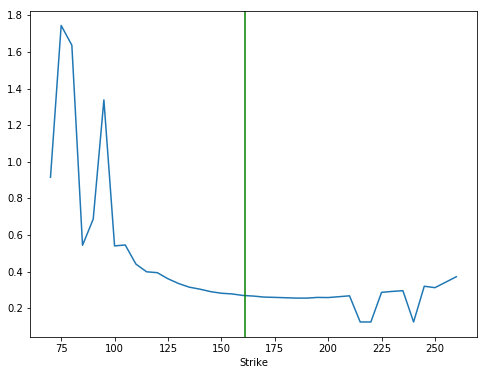

In [68]:
ax = call06.set_index('Strike').loc[:, 'IV'].plot(figsize=(8,6))
ax.axvline(call06.Underlying_Price.iloc[0], color='g');

In [69]:
put06 = aapl_opt.loc[(aapl_opt.Expiry=='2018-06-15') & (aapl_opt.Type=='put')]
put06

,Strike,Expiry,Type,...,Quote_Time,Last_Trade_Date,JSON
39,70.0,2018-06-15,put,...,2018-02-07 20:44:02,2017-12-28 17:43:00,"{'contractSymbol': 'AAPL180615P00070000', 'str..."
47,75.0,2018-06-15,put,...,2018-02-07 20:44:02,2017-12-08 20:11:29,"{'contractSymbol': 'AAPL180615P00075000', 'str..."
59,80.0,2018-06-15,put,...,2018-02-07 20:44:02,2018-02-01 20:48:30,"{'contractSymbol': 'AAPL180615P00080000', 'str..."
72,85.0,2018-06-15,put,...,2018-02-07 20:44:02,2018-02-06 20:04:31,"{'contractSymbol': 'AAPL180615P00085000', 'str..."
84,90.0,2018-06-15,put,...,2018-02-07 20:44:02,2018-02-07 18:15:08,"{'contractSymbol': 'AAPL180615P00090000', 'str..."
...,...,...,...,...,...,...,...
831,215.0,2018-06-15,put,...,2018-02-07 20:44:02,2017-12-01 16:08:34,"{'contractSymbol': 'AAPL180615P00215000', 'str..."
843,220.0,2018-06-15,put,...,2018-02-07 20:44:02,2018-01-29 14:34:32,"{'contractSymbol': 'AAPL180615P00220000', 'str..."
858,225.0,2018-06-15,put,...,2018-02-07 20:44:02,2018-02-05 19:21:42,"{'contractSymbol': 'AAPL180615P00225000', 'str..."
870,230.0,2018-06-15,put,...,2018-02-07 20:44:02,2017-11-27 16:14:47,"{'contractSymbol': 'AAPL180615P00230000', 'str..."


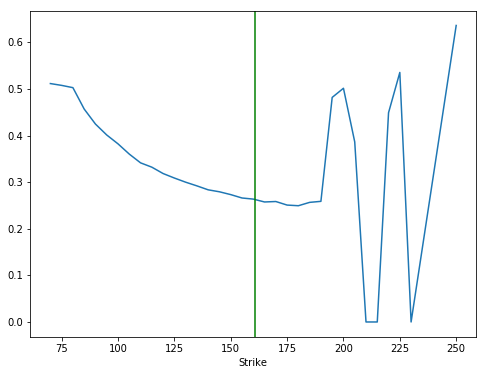

In [70]:
ax = put06.set_index('Strike').loc[:, 'IV'].plot(figsize=(8,6))
ax.axvline(put06.Underlying_Price.iloc[0], color='g');

## 3. Gráficos de payoff

La función que devuelve el valor de la opción en la fecha de expiración es:

In [71]:
def call_payoff(ST, K):
    return max(0, ST-K)

In [75]:
call_payoff(25, 30), call_payoff(33, 30)

(0, 3)

Podemos hacer una función para considerar varias posibilidades de precios de maduración

In [77]:
def call_payoffs(STmin, STmax, K, step=1):
    maturities = np.arange(STmin, STmax+step, step)
    payoffs = np.vectorize(call_payoff)(maturities, K)
    df = pd.DataFrame({'Strike': K, 'Payoff': payoffs}, index=maturities)
    df.index.name = 'Precio de maduración'
    return df

In [79]:
call_payoffs(25,40,30)

,Payoff,Strike
Precio de maduración,,
25,0,30
26,0,30
27,0,30
28,0,30
29,0,30
...,...,...
36,6,30
37,7,30
38,8,30


Ahora, podemos utilizar la función anterior para obtener los gráficos de payoff

In [80]:
def plot_call_payoffs(STmin, STmax, K, step=1):
    payoffs = call_payoffs(STmin, STmax, K, step)
    plt.ylim(payoffs.Payoff.min() - 10, payoffs.Payoff.max() + 10)
    plt.ylabel("Payoff")
    plt.xlabel("Precio de maduración")
    plt.title('Payoff call, Precio strike={0}'.format(K))
    plt.xlim(STmin, STmax)
    plt.plot(payoffs.index, payoffs.Payoff.values);

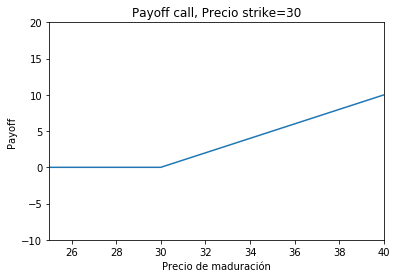

In [81]:
plot_call_payoffs(25,40,30)

De la misma manera para una opción de venta

In [86]:
def put_payoff(ST, K):
    return max(0, K-ST)

In [87]:
put_payoff(25, 30), put_payoff(33, 30)

(5, 0)

In [88]:
def put_payoffs(STmin, STmax, K, step=1):
    maturities = np.arange(STmin, STmax+step, step)
    payoffs = np.vectorize(put_payoff)(maturities, K)
    df = pd.DataFrame({'Strike': K, 'Payoff': payoffs}, index=maturities)
    df.index.name = 'Precio de maduración'
    return df

In [89]:
put_payoffs(25,40,30)

,Payoff,Strike
Precio de maduración,,
25,5,30
26,4,30
27,3,30
28,2,30
29,1,30
...,...,...
36,0,30
37,0,30
38,0,30


In [90]:
def plot_put_payoffs(STmin, STmax, K, step=1):
    payoffs = put_payoffs(STmin, STmax, K, step)
    plt.ylim(payoffs.Payoff.min() - 10, payoffs.Payoff.max() + 10)
    plt.ylabel("Payoff")
    plt.xlabel("Precio de maduración")
    plt.title('Payoff put, Precio strike={0}'.format(K))
    plt.xlim(STmin, STmax)
    plt.plot(payoffs.index, payoffs.Payoff.values);

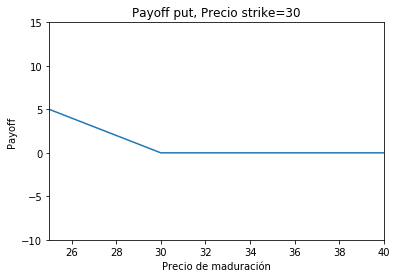

In [91]:
plot_put_payoffs(25,40,30)

Bueno, pero ¿así de fácil?

Según Black-Scholes debe haber un equilibrio:

In [92]:
def call_pnl_buyer(ct, K, STmin, STmax, step = 1):
    maturities = np.arange(STmin, STmax+step, step)
    payoffs = np.vectorize(call_payoff)(maturities, K)
    df = pd.DataFrame({'Strike': K, 'Payoff': payoffs, 'Prima': ct, 'PnL': payoffs-ct}, index=maturities)
    df.index.name = 'Precio de maduración'
    return df

In [93]:
call_pnl_buyer(12, 15, 10, 35)

,Payoff,PnL,Prima,Strike
Precio de maduración,,,,
10,0,-12,12,15
11,0,-12,12,15
12,0,-12,12,15
13,0,-12,12,15
14,0,-12,12,15
...,...,...,...,...
31,16,4,12,15
32,17,5,12,15
33,18,6,12,15


In [94]:
def call_pnl_seller(ct, K, STmin, STmax, step = 1):
    maturities = np.arange(STmin, STmax+step, step)
    payoffs = np.vectorize(call_payoff)(maturities, K)
    df = pd.DataFrame({'Strike': K, 'Payoff': payoffs, 'Prima': ct, 'PnL': ct-payoffs}, index=maturities)
    df.index.name = 'Precio de maduración'
    return df

In [95]:
call_pnl_seller(12, 15, 10, 35)

,Payoff,PnL,Prima,Strike
Precio de maduración,,,,
10,0,12,12,15
11,0,12,12,15
12,0,12,12,15
13,0,12,12,15
14,0,12,12,15
...,...,...,...,...
31,16,-4,12,15
32,17,-5,12,15
33,18,-6,12,15


In [96]:
def call_pnl_combined(ct, K, STmin, STmax, step = 1):
    maturities = np.arange(STmin, STmax+step, step)
    payoffs = np.vectorize(call_payoff)(maturities, K)
    df = pd.DataFrame({'Strike': K, 'Payoff': payoffs, 'Prima': ct, 'PnLcomprador': payoffs-ct, 'PnLvendedor': ct-payoffs}, index=maturities)
    df.index.name = 'Precio de maduración'
    return df

In [97]:
call_pnl_combined(12, 15, 10, 35)

,Payoff,PnLcomprador,PnLvendedor,Prima,Strike
Precio de maduración,,,,,
10,0,-12,12,12,15
11,0,-12,12,12,15
12,0,-12,12,12,15
13,0,-12,12,12,15
14,0,-12,12,12,15
...,...,...,...,...,...
31,16,4,-4,12,15
32,17,5,-5,12,15
33,18,6,-6,12,15


In [98]:
def put_pnl_buyer(ct, K, STmin, STmax, step = 1):
    maturities = np.arange(STmin, STmax+step, step)
    payoffs = np.vectorize(put_payoff)(maturities, K)
    df = pd.DataFrame({'Strike': K, 'Payoff': payoffs, 'Prima': ct, 'PnL': payoffs-ct}, index=maturities)
    df.index.name = 'Precio de maduración'
    return df

In [99]:
put_pnl_buyer(2, 15, 10, 30)

,Payoff,PnL,Prima,Strike
Precio de maduración,,,,
10,5,3,2,15
11,4,2,2,15
12,3,1,2,15
13,2,0,2,15
14,1,-1,2,15
...,...,...,...,...
26,0,-2,2,15
27,0,-2,2,15
28,0,-2,2,15


In [100]:
def put_pnl_seller(ct, K, STmin, STmax, step = 1):
    maturities = np.arange(STmin, STmax+step, step)
    payoffs = np.vectorize(put_payoff)(maturities, K)
    df = pd.DataFrame({'Strike': K, 'Payoff': payoffs, 'Prima': ct, 'PnL': ct-payoffs}, index=maturities)
    df.index.name = 'Precio de maduración'
    return df

In [101]:
put_pnl_seller(2, 15, 10, 30)

,Payoff,PnL,Prima,Strike
Precio de maduración,,,,
10,5,-3,2,15
11,4,-2,2,15
12,3,-1,2,15
13,2,0,2,15
14,1,1,2,15
...,...,...,...,...
26,0,2,2,15
27,0,2,2,15
28,0,2,2,15


In [102]:
def put_pnl_combined(ct, K, STmin, STmax, step = 1):
    maturities = np.arange(STmin, STmax+step, step)
    payoffs = np.vectorize(put_payoff)(maturities, K)
    df = pd.DataFrame({'Strike': K, 'Payoff': payoffs, 'Prima': ct, 'PnLcomprador': payoffs-ct, 'PnLvendedor': ct-payoffs}, index=maturities)
    df.index.name = 'Precio de maduración'
    return df

In [103]:
put_pnl_combined(2, 15, 10, 30)

,Payoff,PnLcomprador,PnLvendedor,Prima,Strike
Precio de maduración,,,,,
10,5,3,-3,2,15
11,4,2,-2,2,15
12,3,1,-1,2,15
13,2,0,0,2,15
14,1,-1,1,2,15
...,...,...,...,...,...
26,0,-2,2,2,15
27,0,-2,2,2,15
28,0,-2,2,2,15


In [104]:
def plot_pnl(pnl_df, okind, who):
    plt.ylim(pnl_df.Payoff.min() - 10, pnl_df.Payoff.max() + 10)
    plt.ylabel("Ganancia/pérdida")
    plt.xlabel("Precio de maduración")
    plt.title('Ganancia y pérdida de una opción {0} para el {1}, Prima={2}, Strike={3}'.format(okind, who, pnl_df.Prima.iloc[0],
    pnl_df.Strike.iloc[0]))
    plt.ylim(pnl_df.PnL.min()-3, pnl_df.PnL.max() + 3)
    plt.xlim(pnl_df.index[0], pnl_df.index[len(pnl_df.index)-1])
    plt.plot(pnl_df.index, pnl_df.PnL)
    plt.axhline(0, color='g');

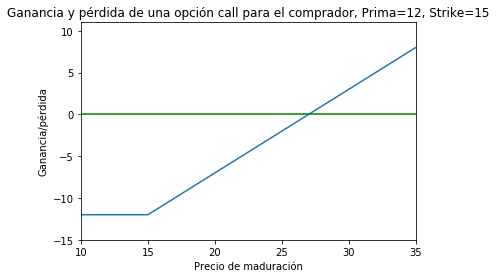

In [105]:
plot_pnl(call_pnl_buyer(12, 15, 10, 35), "call", "comprador")

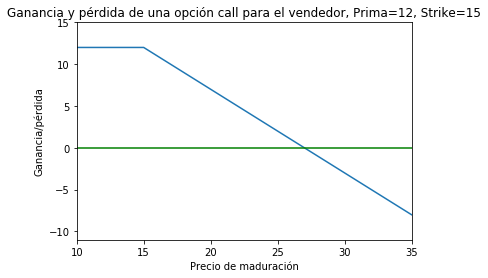

In [106]:
plot_pnl(call_pnl_seller(12, 15, 10, 35), "call", "vendedor")

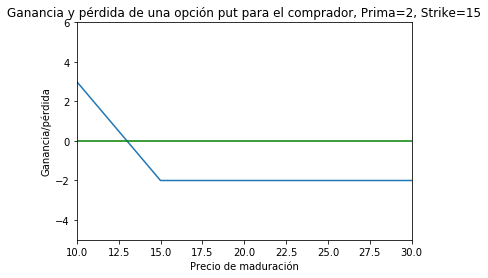

In [107]:
plot_pnl(put_pnl_buyer(2, 15, 10, 30), "put", "comprador")

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>